In [18]:
#importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from plotly.subplots import make_subplots
from plotly.offline import iplot
from plotly import tools
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [19]:
#loading the data
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [20]:
#viewing the data
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
#columns in the dta
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Exploratory Data Analysis

In [23]:
#a for loop to view unique features in the data
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

age
[19 18 28 33 32]
47

sex
['female' 'male']
2

bmi
[27.9   33.77  33.    22.705 28.88 ]
548

children
[0 1 3 2 5]
6

smoker
['yes' 'no']
2

region
['southwest' 'southeast' 'northwest' 'northeast']
4

charges
[16884.924    1725.5523   4449.462   21984.47061  3866.8552 ]
1337



In [24]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [25]:
#data viz using pieplot
labels =['southwest', 'southeast', 'northwest', 'northeast']

trace_pie = go.Pie(labels=labels,
                   values=df['region'].value_counts(),
                   textinfo='label+percent',hoverinfo='label+percent',
                   marker=dict(line=dict(width=1.5)),)

layout = go.Layout(title='Region Pie Plot' ,titlefont=dict(size=20))

iplot(dict(data=trace_pie,layout=layout))

**The above plot shows a distribution of region, where southwest has the highest count**

In [26]:
#encoding the cat variables using the map function
df['sex']= df['sex'].map({'female':0, 'male':1 })
df['smoker']= df['smoker'].map({'yes':1, 'no':0})
df['region']=df['region'].map({'southwest':0,'southeast':1, 'northwest':2, 'northeast':3}) 

In [27]:
#visualizing the dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,0,2007.94500


<AxesSubplot:xlabel='charges', ylabel='Count'>

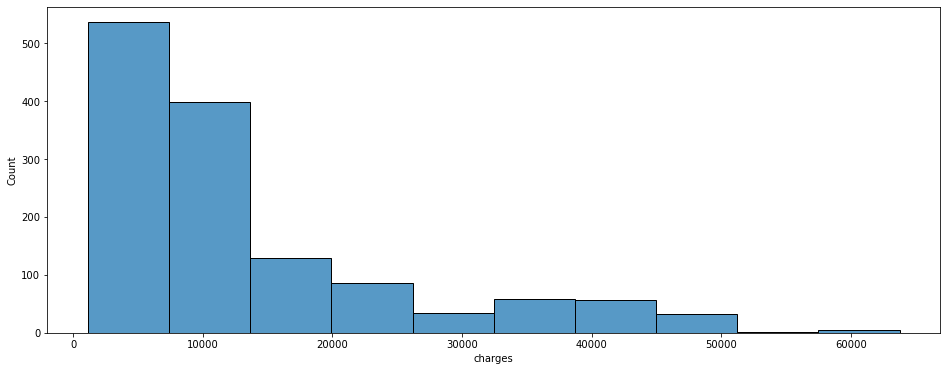

In [28]:
#a histplot showing the distribution of the output variable.
fig= plt.figure(figsize=(16,6))
sns.histplot(df['charges'], bins=10)

In [29]:
#columns in the data
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
#statistical analysis on the output variable
print(f"The min charges is {df['charges'].min()}")
print(f"The max charges is {df['charges'].max()}")


The min charges is 1121.8739
The max charges is 63770.42801


In [31]:
#statistical analysis on the age feature in the data
print(f"The min age is {df['age'].min()}")
print(f"The max age is {df['age'].max()}")
print(f"The avg age is {df['age'].mean()}")

The min age is 18
The max age is 64
The avg age is 39.20702541106129


# Setting up the frame work

In [32]:
#splitting the data in to train & test
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state= 1)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state= 1 )

In [33]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state= 1)
#df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=1)

In [34]:
#checking length of train & test
len(df_train), len(df_test)

(1070, 268)

In [35]:
#visualizing the train dataset
df_train

,age,sex,bmi,children,smoker,region,charges
216,53,0,26.600,0,0,2,10355.64100
731,53,1,21.400,1,0,0,10065.41300
866,18,1,37.290,0,0,1,1141.44510
202,60,0,24.035,0,0,2,13012.20865
820,45,1,33.700,1,0,0,7445.91800
...,...,...,...,...,...,...,...
715,60,1,28.900,0,0,0,12146.97100
905,26,0,29.355,2,0,3,4564.19145
1096,51,0,34.960,2,1,3,44641.19740
235,40,0,22.220,2,1,1,19444.26580


In [36]:
X_train = df_train.reset_index(drop = True).copy()
X_test = df_test.reset_index(drop= True).copy()

In [37]:
X_train

,age,sex,bmi,children,smoker,region,charges
0,53,0,26.600,0,0,2,10355.64100
1,53,1,21.400,1,0,0,10065.41300
2,18,1,37.290,0,0,1,1141.44510
3,60,0,24.035,0,0,2,13012.20865
4,45,1,33.700,1,0,0,7445.91800
...,...,...,...,...,...,...,...
1065,60,1,28.900,0,0,0,12146.97100
1066,26,0,29.355,2,0,3,4564.19145
1067,51,0,34.960,2,1,3,44641.19740
1068,40,0,22.220,2,1,1,19444.26580


In [38]:
#transforming the data
y_train = np.log1p(df_train.charges.values)
y_test = np.log1p(df_test.charges.values)

In [39]:
#del the output variable from the input variable
del X_train['charges']
del X_test['charges']

In [40]:
y_train

array([ 9.24538324,  9.21695972,  7.04092607, ..., 10.70643482,
        9.87535892,  9.35489287])

# Linear reg

In [41]:
#linear regression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [42]:
#applying it on the test data
y_pred= lin.predict(X_test)

In [43]:
#creating a new dataframe for the actual pred and the predicted
new_df = pd.DataFrame({'actual': y_test, 'lin': y_pred})

In [44]:
new_df

,actual,lin
0,7.406972,8.023069
1,9.337345,9.279887
2,9.082461,9.039869
3,9.247875,9.401795
4,7.651634,7.935310
...,...,...
263,10.599254,10.356669
264,10.668594,10.560483
265,10.696563,10.723708
266,7.667571,8.123800


# Model Evaluation

In [47]:
#evaluating the model using r2_score, Mean absolute error, Mean square error
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error, mean_absolute_error
score = metrics.r2_score(y_test, y_pred).round(2)
Mse_score = metrics.mean_squared_error(y_test, y_pred).round(2)
Mae = metrics.mean_absolute_error(y_test, y_pred).round(2)
print(f"r2 score is {score}")
print(f"MSE score is {Mse_score}")
print(f"MAE score is {Mae}")

r2 score is 0.78
MSE score is 0.19
MAE score is 0.28


In [48]:
#creating a dataframe for testing the model
data= {'age':40,
      'sex':1,
      'bmi':40.30,
       'children':4,
      'smoker':1,
      'region':2}

df= pd.DataFrame(data, index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [49]:
#testing the model
new_df= lin.predict(df)
np.expm1(new_df)

array([46494.53056525])

# Saving the Model

In [50]:
#full train using lin reg
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [51]:
#importing the library to save the model
import joblib

In [52]:
#saving the model
joblib.dump(lin, 'model_lin')

['model_lin']

In [53]:
model= joblib.load('model_lin')
np.expm1(model.predict(df))

array([46494.53056525])